---

# **Data Cleaning in Machine Learning**

Data cleaning is a crucial step in the **Machine Learning (ML)** pipeline. It involves identifying and resolving issues such as **missing**, **duplicate**, or **irrelevant data** to ensure that the dataset is reliable and ready for analysis.

---

## **Why Data Cleaning Matters**

Raw data—such as **log files**, **transaction records**, or **audio/video recordings**—is often:

* Noisy
* Incomplete
* Inconsistent

These issues can significantly **reduce model accuracy** and lead to misleading conclusions.

---

## **Goals of Data Cleaning**

Data cleaning aims to:

* Ensure the data is **accurate**, **consistent**, and **error-free**
* Enhance the quality of the dataset prior to model training
* Improve the accuracy and efficiency of ML workflows

---

## **Data Cleaning and EDA**

Clean datasets are essential for effective **Exploratory Data Analysis (EDA)**.
Well-prepared data:

* Improves interpretability
* Reveals meaningful insights
* Supports better decision-making
* Helps guide feature engineering and model selection

---

Here is a clean, well-structured **Markdown version** of your content:

---

# **How to Perform Data Cleaning**

Data cleaning is a systematic process used to identify and correct errors in a dataset. It begins by detecting issues such as **missing values**, **duplicates**, and **outliers**. Proper data cleaning ensures the dataset is accurate, consistent, and ready for further analysis or model development.

---

## **Essential Steps in Data Cleaning**

### **1. Remove Unwanted Observations**

* Eliminate **duplicates**, **irrelevant entries**, or **redundant data**
* Helps reduce noise and improves model reliability

---

### **2. Fix Structural Errors**

* Standardize **data formats**, **naming conventions**, and **variable types**
* Correct inconsistencies such as typos, mislabeled categories, or formatting differences

---

### **3. Manage Outliers**

* Detect and handle **extreme values** that may skew model results
* Techniques include:

  * Removal
  * Transformation
  * Capping (Winsorization)

---

### **4. Handle Missing Data**

* Address gaps in the dataset using:

  * **Imputation** (mean, median, mode, model-based)
  * **Deletion** (listwise or pairwise)
  * Advanced techniques (KNN imputation, MICE, interpolation)

---


### **Implementation for Data Cleaning** 

**Step 1: Import Libraries and Load Dataset**

**We will import all the necessary libraries i.e pandas and numpy.**

In [1]:
import numpy as np
import pandas as pd

In [2]:
#load dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
#load the top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#display last  5 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#check information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

### **Step 2: Check for Duplicate Rows**

df.duplicated(): Returns a boolean Series indicating duplicate rows.

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

**Step 3: Identify Column Data Types**

List comprehension with .dtype attribute to separate categorical and numerical columns.

object dtype: Generally used for text or categorical data.

In [4]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


**Step 4: Count Unique Values in the Categorical Columns**

df[numeric_columns].nunique(): Returns count of unique values per column.

In [9]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

**Step 5: Calculate Missing Values as Percentage**

df.isnull(): Detects missing values, returning boolean DataFrame.

Sum missing across columns, normalize by total rows and multiply by 100.

In [10]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

**Step 6: Drop Irrelevant or Data-Heavy Missing Columns**

df.drop(columns=[]): Drops specified columns from the DataFrame.

df.dropna(subset=[]): Removes rows where specified columns have missing values.

fillna(): Fills missing values with specified value (e.g., mean).

In [11]:
df1 = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df1.dropna(subset=['Embarked'], inplace=True)
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_16316\56642916.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(), inplace=True)


**Step 7: Detect Outliers with Box Plot**

matplotlib.pyplot.boxplot(): Displays distribution of data, highlighting median, quartiles and outliers.

plt.show(): Renders the plot.

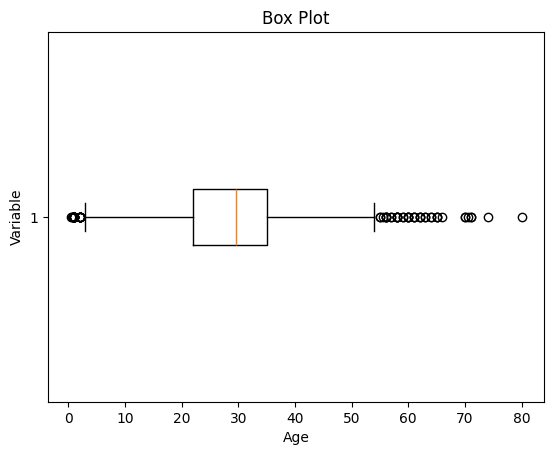

In [13]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

**Step 10: Data validation and verification**

Data validation and verification involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge. For the machine learning prediction we separate independent and target features. Here we will consider only 'Sex' 'Age' 'SibSp', 'Parch' 'Fare' 'Embarked' only as the independent features and Survived as target variables because PassengerId will not affect the survival rate.

In [14]:
X = df1[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df1['Survived']

**Step 11: Data formatting**

Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.

Scaling involves transforming the values of features to a specific range. It maintains the shape of the original distribution while changing the scale. It is useful when features have different scales and certain algorithms are sensitive to the magnitude of the features. Common scaling methods include:

1. Min-Max Scaling: Min-Max scaling rescales the values to a specified range, typically between 0 and 1. It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse
C:\Users\USER\AppData\Local\Temp\ipykernel_16316\1761829158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


2. Standardization (Z-score scaling): Standardization transforms the values to have a mean of 0 and a standard deviation of 1. It centers the data around the mean and scales it based on the standard deviation. Standardization makes the data more suitable for algorithms that assume a Gaussian distribution or require features to have zero mean and unit variance.